# Stats and Public Health Part 2 - Data Analysis

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

This report is based on mosquito tracking data from 2008 to 2019 - it's important to keep this in mind while performing data analysis.

This report will provide a series of analyses on the relationship between the different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location.

Notes: Majority of the code and markdown has been derived from the Brainstation lectures. If inspiration is taken from an outside source, then it will be mentioned in markdown. Most of the verbatim markdown will be notes with the (FL) *from lecture* notation. Code taken from the previous assignment will be noted with the (PA) *previous assignment* notation.

## Part 0: Initial Exploration

### Getting a look and feel of the data

In [384]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm #used for plotting
from numpy.random import randn
from scipy.stats import ttest_ind
# import statsmodels linear model for our regression
from statsmodels.regression import linear_model 
import statsmodels.api as sm

In [385]:
#Taking a peek into the data
df = pd.read_csv('mosquito_data.csv')
df.head() # display the top 5 rows

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


The block column seems to show the first few digits of the trap's address. There are NaN values for the first row in Lat and Lon, which may need to be dealt with later. Also, it seems like the Mosquito ID and Species column store similar information, which we will also deal with later.

In [386]:
print("Columns")
display(df.columns)

print("\n Information")
display(df.info)

print("\n Summary Statistics")
df.describe()

Columns


Index(['Year', 'Week', 'Address Block', 'Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'Mosquito ID', 'WNV Present', 'Species', 'Lat',
       'Lon'],
      dtype='object')


 Information


<bound method DataFrame.info of        Year  Week           Address Block  Block   Trap Trap type  \
0      2019    39   100XX W OHARE AIRPORT    100   T910    GRAVID   
1      2019    39       52XX S KOLMAR AVE     52   T114    GRAVID   
2      2019    39      58XX N WESTERN AVE     58   T028    GRAVID   
3      2019    39  39XX N SPRINGFIELD AVE     39   T228    GRAVID   
4      2019    39     131XX S BRANDON AVE    131   T209    GRAVID   
...     ...   ...                     ...    ...    ...       ...   
18490  2016    36           3XX W 18TH ST      3   T043    GRAVID   
18491  2007    34    46XX N MILWAUKEE AVE     46   T003    GRAVID   
18492  2016    30        127XX S DOTY AVE    127   T115    GRAVID   
18493  2017    33      20XX N DOMINICK ST     20  T240B  SENTINEL   
18494  2015    33   100XX W OHARE AIRPORT    100   T902    GRAVID   

                      Date  Mosquito number Mosquito ID WNV Present  \
0      2019-09-26 00:09:00                2         Res    negative 


 Summary Statistics


,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


### Dealing with Nulls

Now that I have an initial glance at the entire dataset, it's time to look at individual columns. Based on the previous assignment, I had learned that the latitude column has bimodal distibution, and it has nulls. So, when it comes to dealing with the null values, "mean would not be our most effective value to fill 
with for the nulls". For simplicity indead of using an outside source for the address blocks, I will drop the null values for now.

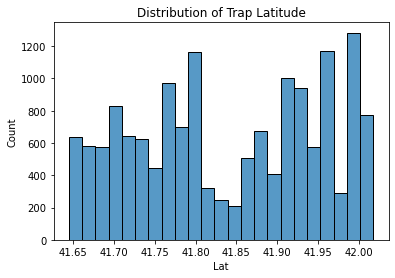

In [387]:
#distribution of latitude
lat_df = pd.DataFrame(df['Lat'])
plt.figure()
plt.title("Distribution of Trap Latitude")
#plt.ylim(0,51) #because max is 50
sns.histplot(lat_df['Lat'],kde=False)
#sns.boxplot(x=num_m['Mosquito number'])
plt.show()
#PA

- multimodal distribution
- many of the rows of data reflect  were set farther North, around 42
- many traps were also set (with a smaller peak) around a latitude of 41.80 and more south
(insights from previous assignment)

In [389]:
#Before dropping null values
df.isnull().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

In [390]:
df.shape

(18495, 13)

There are 18495 rows and 13 columns in the dataset. It seems only the Lat and Lon columns have NaNs present. (NaNs and nulls are used interchangeably in this report

In [392]:
#Dropping nulls
df.dropna(axis=0, inplace = True)

In [393]:
#Before dropping null values
df.isnull().sum()

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

Help with the dropna() function: https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

As we can see, it looks like there are no longer any nulls in the Lat and Lon columns. To confirm this, let's see if the shape of the data has changed - I anticipate less rows.

In [394]:
df.shape

(15571, 13)

The number of columns after these operations are the same. Now the dataframe has 15571 rows, less compared to 18495 now that the nulls are removed

### Dealing columns with duplicate information

As previously mentioned, it looked like the mosquito ID and Species column shared the same information. Let's use value counts to get an approximate idea of whether the two columns match.

In [395]:
df["Mosquito ID"].value_counts()

Res    9922
Pip    4653
Ter     826
Sal     170
Name: Mosquito ID, dtype: int64

In [396]:
df['Species'].value_counts()

CULEX RESTUANS      9922
CULEX PIPIENS       4653
CULEX TERRITANS      826
CULEX SALINARIUS     170
Name: Species, dtype: int64

This was a rough way to check if the columns match. The mosquito ID looks like a shorter denotation of the species. So I will drop the Mosquito ID column since it is essentially sharing the same information - about the mosquito species.

In [397]:
df = df.drop(columns = 'Mosquito ID')
#checking to see if the column got dropped
df.columns

Index(['Year', 'Week', 'Address Block', 'Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon'],
      dtype='object')

It looks like the mosquito ID column has successful been dropped. The year, week and date column are also showing the same information. It seems premature to decide which to drop. This will be decided after some basic analysis.

## Part 1: Basic Analysis

### Objective: Convert the WNV Present column into a binary column

In [398]:
#seeing the different types of values in the WNV present column
#looking out for any unexpected values besides positive and negative

df['WNV Present'].value_counts()

negative    12453
positive     3118
Name: WNV Present, dtype: int64

In [399]:
df['WNV Present'] = df['WNV Present'].replace({'positive':1, 'negative':0})

In [400]:
#checking to see if the column got binarized

In [401]:
df['WNV Present'].value_counts()

0    12453
1     3118
Name: WNV Present, dtype: int64

In [404]:
df['WNV Present'].unique()

array([0, 1], dtype=int64)

Now there are 12453 counts of the value 0, whereas before it was for 'negative'. There are 3118 counts for the value 1, as it was before for 'positive'. We have confirmed that the column has been successfully binarized.

### Objective: create dummy variables from the Trap type column.

In [33]:
dummy_df = pd.get_dummies(df['Trap type'])
dummy_df

,CDC,GRAVID,OVI,SENTINEL
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
...,...,...,...,...
18489,0,1,0,0
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0


Four types of traps seems to be CDC< GRAVID, OVI and SENTINEL

Now I can't compare the data frame with the dummy variables and the original dataframe. I will merge them now via concatentation.

In [34]:
df = pd.concat([df, dummy_df], axis = 1)
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,CDC,GRAVID,OVI,SENTINEL
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,0,1,0,0
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,0,1,0,0
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,0,1,0,0
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.921777,-87.632140,0,1,0,0


I can see some columns on the far right, with various trap types and ones and zeroes as the value. I will likely need to remove the trap type column later since it is not numerical later, when I think about linear models.

### Objective: What is the average number of mosquitoes for each month?

The original dataset does not have a column that refers to solely month. So next I will extract the month of when the moquitos were caught from the date column

In [405]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
month_nums = df['Month']
month_nums.values

array([9, 9, 9, ..., 8, 7, 8], dtype=int64)

Help with converting date to month: https://www.codegrepper.com/code-examples/python/numpy+get+year+only+from+year+month+-pandas

In [59]:
#trying to get the total mosquito counts

In [60]:
mosquito_number_counts = df['Mosquito number'].value_counts()
#mosquito_number_counts.index
mosquito_number_counts.values

array([3730, 1966, 1342,  948,  775,  613,  525,  455,  438,  337,  311,
        292,  276,  255,  200,  190,  189,  164,  149,  144,  121,  118,
        115,  115,  109,  102,   99,   97,   96,   95,   79,   79,   76,
         73,   70,   70,   69,   66,   66,   60,   59,   55,   55,   54,
         53,   52,   49,   41,   41,   38], dtype=int64)

In [61]:
# can't plot a bar graph with different shapes. So stating assumptions after the chart...

In [408]:
mpm = df.groupby('Month')['Mosquito number'].mean()
mpm

Month
5      1.972973
6      8.747635
7     10.701800
8     11.664663
9      8.312563
10     5.368421
Name: Mosquito number, dtype: float64

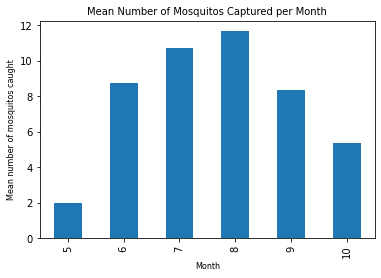

In [409]:
plt.figure()
mpm.plot(kind='bar')
plt.title("Mean Number of Mosquitos Captured per Month", fontsize = 10)
plt.xlabel("Month", fontsize = 8)
plt.ylabel("Mean number of mosquitos caught", fontsize = 8)
plt.show()

- These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.
- Mosquitos were only caught between May and October
- We could assume that the researchers meant to add 50+ when typing 50, and didn't want to write more
- One key insight we can garner from this is that on average, most mosquitoes were caught in August
- More generally, we can say that on average more mosquitos were caught in the hot summer months of July and August, as compared to months closer to spring and fall
- Someone with more domain knowledge could make further inferences, such as how mosquitos thrive in a warmer climate

## Part 2 - Statistical Analysis

### Objective: Determine whether there is a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

Taking an initial glance at the differences between mosquito species that have West Nile Virus present in them.

In [410]:
g1 = df.groupby( 'Species')['WNV Present'].sum().reset_index()
g1

,Species,WNV Present
0,CULEX PIPIENS,1175
1,CULEX RESTUANS,1924
2,CULEX SALINARIUS,5
3,CULEX TERRITANS,14


It looks like CULEX PIPIENS had the more west nile virus present in them, with CULEX SALINARIUS only having 5 rows with mosquitos having WNV. Let's visualize this distrubution.

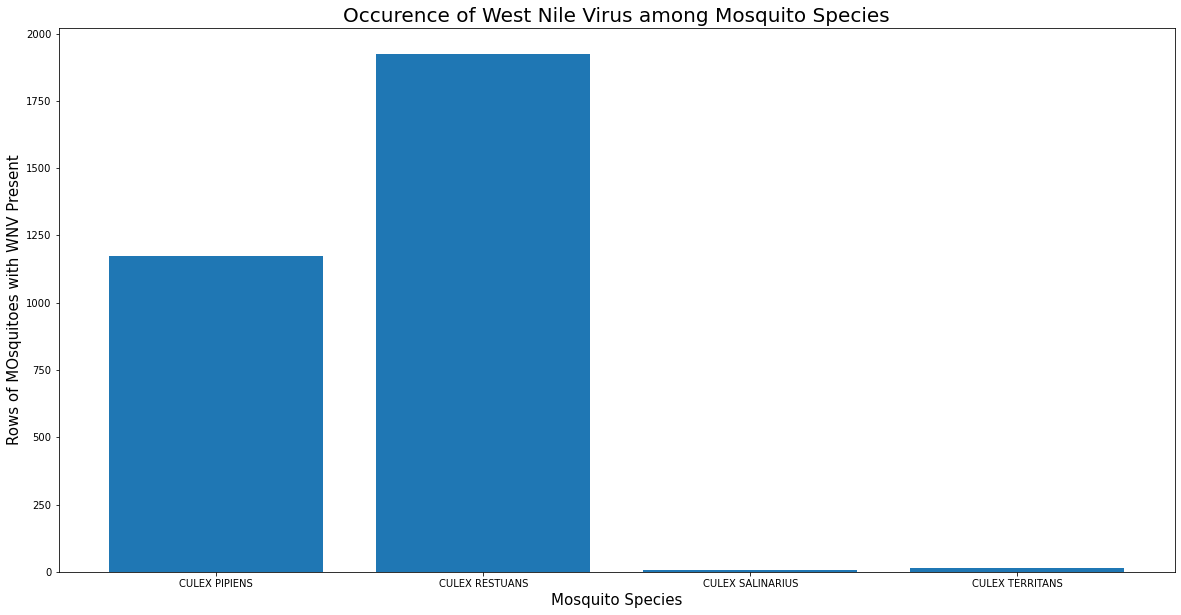

In [417]:
plt.figure(figsize = (20,10))
plt.bar(g1['Species'], g1['WNV Present'])
plt.title("Occurence of West Nile Virus among Mosquito Species",fontsize = 20)
plt.xlabel("Mosquito Species",fontsize = 15)
plt.ylabel("Rows of MOsquitoes with WNV Present",fontsize = 15)
plt.show()

Thus far it looks like CULEX RESTUANS species has way more rows indicating mosquitoes with WNV than the others. However, we don't just want to look at rows, it's important to look at mosquito numbers. This is with the assumption that when WNV is positive, *all* of the mosquitos trapped had West Nile Virus present in them.

In [423]:
#Creating a column that keeps a track of mosquito numbers only with WNV in them

df["WNV Mosquitos"] = np.where(df['WNV Present'] == 1, df['Mosquito number'], 0)
df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,WNV Mosquitos
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0
5,2019,39,21XX N CANNON DR,21,T054C,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.921777,-87.632140,9,0


In [424]:
#Making sure the new column does not have all 0s
anova_data["CULEX PIPIENS"].sum()

26114

Using an ANOVA test to see if there's a significant difference between WNV mosquit numbers. 

In [425]:
anova_data = {}
species_types = df["Species"].unique()

# slice out the mosquitos caught for each browser type
for species in species_types:
    anova_data[species] = df.loc[df["Species"] == species, "WNV Mosquitos"]

In [426]:
df['Species'].unique() #making the text easily available to plug into the f_oneway function

array(['CULEX RESTUANS', 'CULEX TERRITANS', 'CULEX SALINARIUS',
       'CULEX PIPIENS'], dtype=object)

In [428]:
stats.f_oneway(anova_data["CULEX PIPIENS"], 
               anova_data['CULEX TERRITANS'], 
               anova_data['CULEX SALINARIUS'],
               anova_data['CULEX PIPIENS'])

F_onewayResult(statistic=66.09110965970119, pvalue=2.5314081318516574e-42)

The p-value is way more than 0.5. So we cannot reject the null hypothesis. There is not enough statistically statistic evidence that species affects the number of mosquitos with WNV present in them.

The ANOVA test does assume that the sobervations for mosquito number are independent, and the variance for all the groups are the same.

Another key assumption make with the above calculations, is that if WNV Present was tested positive, then that means all of the mosquitos caught have WNV. There would need to be more contact with the science team to confirm this assumption.

### Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [429]:
mn_corr = df.corr()
mn_corr['Mosquito number'].sort_values()

Lon               -0.100425
Month             -0.009376
Week               0.000448
Lat                0.059195
Block              0.081334
Year               0.117062
WNV Present        0.417179
WNV Mosquitos      0.665169
Mosquito number    1.000000
Name: Mosquito number, dtype: float64

In [434]:
mn_corr

,Year,Week,Block,Mosquito number,WNV Present,Lat,Lon,Month,WNV Mosquitos
Year,1.000000,-0.020908,-0.067612,0.117062,0.141943,0.064088,-0.040140,-0.102231,0.095452
Week,-0.020908,1.000000,-0.009073,0.000448,0.183040,-0.001914,-0.009174,0.949340,0.127010
Block,-0.067612,-0.009073,1.000000,0.081334,0.008864,-0.261829,0.099292,0.001560,0.061468
Mosquito number,0.117062,0.000448,0.081334,1.000000,0.417179,0.059195,-0.100425,-0.009376,0.665169
WNV Present,0.141943,0.183040,0.008864,0.417179,1.000000,0.072799,-0.126576,0.169369,0.768942
Lat,0.064088,-0.001914,-0.261829,0.059195,0.072799,1.000000,-0.695048,-0.007202,0.074832
Lon,-0.040140,-0.009174,0.099292,-0.100425,-0.126576,-0.695048,1.000000,-0.006613,-0.106157
Month,-0.102231,0.949340,0.001560,-0.009376,0.169369,-0.007202,-0.006613,1.000000,0.120109
WNV Mosquitos,0.095452,0.127010,0.061468,0.665169,0.768942,0.074832,-0.106157,0.120109,1.000000


It looks like the Longitude, and month are negatively correlated with mosquito number. All the other columns seem to have a positive correlation.

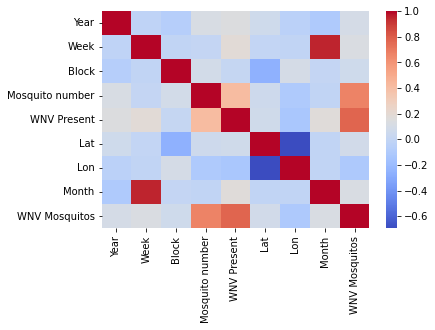

In [430]:
sns.heatmap(mn_corr, cmap='coolwarm')
sns.heatmap;

In [ ]:
no.corrcooef()

The derived column I made with mosquito numbers understandably have a high correlation with the WNV present column. This is understandable because the WNV Mosquitos column was formed via a calculation with the mosquito number. 
Besides that, SENTINEL trap and year seem to have a slightly higher correlation compared to other variables.

In [435]:
X = df.drop(columns = ['Mosquito number'])

It looks like the correlations are mostly under 0.05. More collinear are week and month, latitude and longitude, and Mosquito and WNV Mosquito (particularly their correlations). We state this to be addressing collinearity in the dataset to a sufficient degree and now can continue to the modeling. We have checked for collinearity being present in the independent variables by performing a correlation analysis. Note that this does not exclude the existence of multi-collinearity. To properly check for this, we would need to employ other techniques, in particular looking at Variance Inflation Factor (VIF). VIF has not been reccommended for this analysis, so it will not be used. (FL

## Part 3 - Advanced Statistical Analysis

### Linear Regression

Objective: run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results, and discuss the model’s limitations. This may end up being an iterative process.
Note:

You will likely see a low R^2 value, that is to be expected.
This dataset does not respond well to performing VIF analysis, so this is not required.
WNV Present must not be one of your independent variables.

In [196]:
#making a copy of the original data frame. Will make changes to this new one to be suited to linear regression
mdf = df.copy()

#### Preparation and Pre-processing

The datatypes of the columns should be numerical before we run them through a linear or logisitical model. So first I will see the data types of columns that are non-numerical, and try to address them appropriately.

In [197]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15571 entries, 1 to 18493
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             15571 non-null  int64  
 1   Week             15571 non-null  int64  
 2   Address Block    15571 non-null  object 
 3   Block            15571 non-null  int64  
 4   Trap             15571 non-null  object 
 5   Trap type        15571 non-null  object 
 6   Date             15571 non-null  object 
 7   Mosquito number  15571 non-null  int64  
 8   WNV Present      15571 non-null  int64  
 9   Species          15571 non-null  object 
 10  Lat              15571 non-null  float64
 11  Lon              15571 non-null  float64
 12  CDC              15571 non-null  uint8  
 13  GRAVID           15571 non-null  uint8  
 14  OVI              15571 non-null  uint8  
 15  SENTINEL         15571 non-null  uint8  
 16  Month            15571 non-null  int64  
 17  WNV Mosquito

It looks like all the columns have numerical datatypes except for Species, Date, Trap type, Trap and Address Block. This next section aims to convert all of their data types into numerical.

Address block already seems to be in a derived, numeric form in the block column. Thus we will drop the Address Block column.

In [198]:
mdf = mdf.drop(columns = "Address Block")

In [200]:
#Confirming that the column has been dropped successfully
mdf.columns

Index(['Year', 'Week', 'Block', 'Trap', 'Trap type', 'Date', 'Mosquito number',
       'WNV Present', 'Species', 'Lat', 'Lon', 'CDC', 'GRAVID', 'OVI',
       'SENTINEL', 'Month', 'WNV Mosquitos'],
      dtype='object')

The trap type column has already been binarized and converted to dummy variables. So the original column can now be dropped.

In [202]:
mdf = mdf.drop(columns = "Trap type")

In [203]:
#Confirming that the column has been dropped successfully
mdf.columns

Index(['Year', 'Week', 'Block', 'Trap', 'Date', 'Mosquito number',
       'WNV Present', 'Species', 'Lat', 'Lon', 'CDC', 'GRAVID', 'OVI',
       'SENTINEL', 'Month', 'WNV Mosquitos'],
      dtype='object')

Date is already present in the dataframe in the form of year, month and week. That's enough information for our analysis, so we can drop the date function as well.

In [204]:
mdf = mdf.drop(columns = "Date")

,Year,Week,Block,Trap,Mosquito number,WNV Present,Species,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,Month,WNV Mosquitos
1,2019,39,52,T114,1,0,CULEX RESTUANS,41.798211,-87.736925,0,1,0,0,9,0
2,2019,39,58,T028,2,0,CULEX RESTUANS,41.987245,-87.689417,0,1,0,0,9,0
3,2019,39,39,T228,1,0,CULEX RESTUANS,41.953664,-87.724987,0,1,0,0,9,0
4,2019,39,131,T209,9,0,CULEX RESTUANS,41.657069,-87.546049,0,1,0,0,9,0
5,2019,39,21,T054C,2,0,CULEX RESTUANS,41.921777,-87.632140,0,1,0,0,9,0


In [205]:
#checking to see if the column has been dropped
mdf.columns

Index(['Year', 'Week', 'Block', 'Trap', 'Mosquito number', 'WNV Present',
       'Species', 'Lat', 'Lon', 'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'Month',
       'WNV Mosquitos'],
      dtype='object')

The trap looks like it's an ID for the trap. There's no indication that the values in trap column mean that the traps are distinct from each other in any way. They could be the exact trap, with different id numbers. This is the inference being made for now.

In [211]:
mdf = mdf.drop(columns = "Trap")

In [212]:
#Confirming trap column has been dropped
mdf.columns

Index(['Year', 'Week', 'Block', 'Mosquito number', 'WNV Present', 'Species',
       'Lat', 'Lon', 'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'Month',
       'WNV Mosquitos', 'CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS',
       'CULEX TERRITANS'],
      dtype='object')

Binarizing the species column using dummy variables:

In [213]:
dummy_df_species = pd.get_dummies(df['Species'])
dummy_df_species

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
...,...,...,...,...
18489,1,0,0,0
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0


In [209]:
#seeing if the columns have been binarized - checking for 0s and 1s in the rows.
mdf = pd.concat([mdf, dummy_df_species], axis = 1)
mdf.head()

,Year,Week,Block,Trap,Mosquito number,WNV Present,Species,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,Month,WNV Mosquitos,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
1,2019,39,52,T114,1,0,CULEX RESTUANS,41.798211,-87.736925,0,1,0,0,9,0,0,1,0,0
2,2019,39,58,T028,2,0,CULEX RESTUANS,41.987245,-87.689417,0,1,0,0,9,0,0,1,0,0
3,2019,39,39,T228,1,0,CULEX RESTUANS,41.953664,-87.724987,0,1,0,0,9,0,0,1,0,0
4,2019,39,131,T209,9,0,CULEX RESTUANS,41.657069,-87.546049,0,1,0,0,9,0,0,1,0,0
5,2019,39,21,T054C,2,0,CULEX RESTUANS,41.921777,-87.632140,0,1,0,0,9,0,0,1,0,0


Now that the species column has been binarized, I can drop the original species column where the data was not numerical.

In [240]:
mdf = mdf.drop(columns = "Species")

Progress check to see if all the columns are numeric now

In [241]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15571 entries, 1 to 18493
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              15571 non-null  int64  
 1   Week              15571 non-null  int64  
 2   Block             15571 non-null  int64  
 3   Mosquito number   15571 non-null  int64  
 4   WNV Present       15571 non-null  int64  
 5   Lat               15571 non-null  float64
 6   Lon               15571 non-null  float64
 7   CDC               15571 non-null  uint8  
 8   GRAVID            15571 non-null  uint8  
 9   OVI               15571 non-null  uint8  
 10  SENTINEL          15571 non-null  uint8  
 11  Month             15571 non-null  int64  
 12  WNV Mosquitos     15571 non-null  int64  
 13  CULEX PIPIENS     15571 non-null  uint8  
 14  CULEX RESTUANS    15571 non-null  uint8  
 15  CULEX SALINARIUS  15571 non-null  uint8  
 16  CULEX TERRITANS   15571 non-null  uint8 

All of the data types look numerical! Which means it's ready to go into a computation model such as linear regression.

I will use a copy of this data frame )mdf) for logistical regression later too. So for now, I will take a copy of the dataframe for linear regression

In [242]:
lin_df = mdf.copy()
#seeing if the data frame got copied properly
lin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15571 entries, 1 to 18493
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              15571 non-null  int64  
 1   Week              15571 non-null  int64  
 2   Block             15571 non-null  int64  
 3   Mosquito number   15571 non-null  int64  
 4   WNV Present       15571 non-null  int64  
 5   Lat               15571 non-null  float64
 6   Lon               15571 non-null  float64
 7   CDC               15571 non-null  uint8  
 8   GRAVID            15571 non-null  uint8  
 9   OVI               15571 non-null  uint8  
 10  SENTINEL          15571 non-null  uint8  
 11  Month             15571 non-null  int64  
 12  WNV Mosquitos     15571 non-null  int64  
 13  CULEX PIPIENS     15571 non-null  uint8  
 14  CULEX RESTUANS    15571 non-null  uint8  
 15  CULEX SALINARIUS  15571 non-null  uint8  
 16  CULEX TERRITANS   15571 non-null  uint8 

#### Checking for Linearity

We need to make sure that there is a linear relationship between any of the variables, and the number of mosquitos caught. WNV Mosquitos is a derived column from mosquito number, so that will also need to be dropped as it would skew the results. First Let's check for linearity visually.

In [312]:
#the column WNV Mosquitos is servived from the y variable, mosquito number. So that column can be dropped
lin_df = lin_df.drop(columns = ['WNV Mosquitos', 'WNV Present'])

In [313]:
lin_df.columns

Index(['Year', 'Week', 'Block', 'Mosquito number', 'Lat', 'Lon', 'CDC',
       'GRAVID', 'OVI', 'SENTINEL', 'Month', 'CULEX PIPIENS', 'CULEX RESTUANS',
       'CULEX SALINARIUS', 'CULEX TERRITANS'],
      dtype='object')

In [439]:
X = lin_df.drop(columns = ['Mosquito number'])
X.columns

Index(['Year', 'Week', 'Block', 'WNV Present', 'Lat', 'Lon', 'CDC', 'GRAVID',
       'OVI', 'SENTINEL', 'Month', 'WNV Mosquitos', 'CULEX PIPIENS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS'],
      dtype='object')

In [440]:
y = lin_df['Mosquito number']
y.head()

1    1
2    2
3    1
4    9
5    2
Name: Mosquito number, dtype: int64

In [441]:
# Checking the shape of X and y variables

print(f'Original data set had {lin_df.shape[0]} rows and {lin_df.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 15571 rows and 17 columns.
X has 15571 rows and 16 columns.
y has 15571 rows and 1 column.


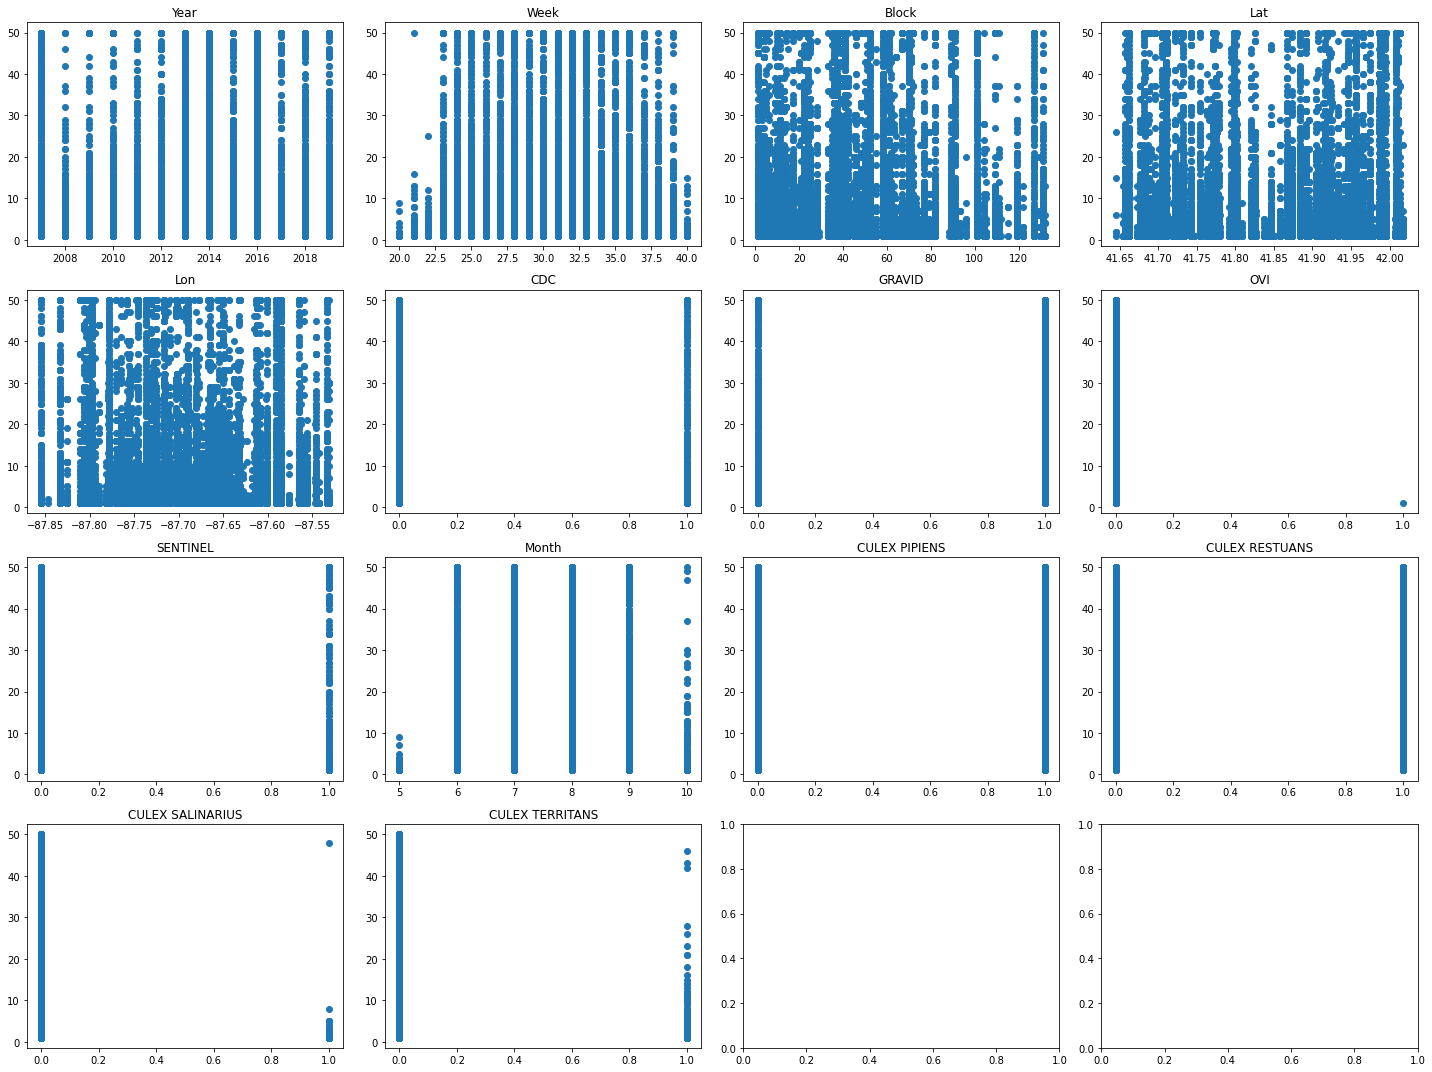

In [317]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(4,4, figsize=(20,15))

count = 1

for col in X.columns:
    plt.subplot(4,4,count)
    plt.scatter(X[col],y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

It looks like there isn't a linear relationship with any of the variables! Our derived column which checks for the mosquito numbers with WNV virus correlates. This could likely be because these test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50. Additionally, we have quite a few binarized column which could lead to a binary distribution, as seem with many of the graphs (e.x. two vertical lines).

#### Checking for Collinearity

The predictor variables for mosquito number should be independent of each other.

In [442]:
# Correlation between independent variables
X_corr = X.corr()
X_corr

,Year,Week,Block,WNV Present,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,Month,WNV Mosquitos,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
Year,1.000000,-0.020908,-0.067612,0.141943,0.064088,-0.040140,-0.262816,0.136232,-0.012419,0.141569,-0.102231,0.095452,-0.355760,0.348782,-0.064900,0.008454
Week,-0.020908,1.000000,-0.009073,0.183040,-0.001914,-0.009174,0.031948,-0.051971,-0.014846,0.045293,0.949340,0.127010,0.318720,-0.317461,-0.011617,0.035480
Block,-0.067612,-0.009073,1.000000,0.008864,-0.261829,0.099292,0.066832,-0.052968,-0.010015,-0.003327,0.001560,0.061468,0.042972,-0.041398,-0.002110,0.002022
WNV Present,0.141943,0.183040,0.008864,1.000000,0.072799,-0.126576,0.013321,-0.043974,-0.004010,0.057386,0.169369,0.768942,0.085287,-0.020968,-0.044850,-0.108408
Lat,0.064088,-0.001914,-0.261829,0.072799,1.000000,-0.695048,-0.066512,0.058505,0.002368,-0.006196,-0.007202,0.074832,-0.057362,0.072622,-0.017966,-0.030309
Lon,-0.040140,-0.009174,0.099292,-0.126576,-0.695048,1.000000,0.082689,-0.093253,-0.007653,0.043587,-0.006613,-0.106157,0.013107,-0.041137,0.020638,0.051910
CDC,-0.262816,0.031948,0.066832,0.013321,-0.066512,0.082689,1.000000,-0.815817,-0.001360,-0.019797,0.075081,0.068042,0.164741,-0.152071,0.027122,-0.022803
GRAVID,0.136232,-0.051971,-0.052968,-0.043974,0.058505,-0.093253,-0.815817,1.000000,-0.038521,-0.560648,-0.082920,-0.122122,-0.105506,0.090183,-0.018431,0.030561
OVI,-0.012419,-0.014846,-0.010015,-0.004010,0.002368,-0.007653,-0.001360,-0.038521,1.000000,-0.000935,-0.013117,-0.003084,0.012276,-0.010621,-0.000842,-0.001897
SENTINEL,0.141569,0.045293,-0.003327,0.057386,-0.006196,0.043587,-0.019797,-0.560648,-0.000935,1.000000,0.036968,0.114294,-0.054200,0.062474,-0.006884,-0.020137


This is difficult to parse through - am putting these values into a heatmap.

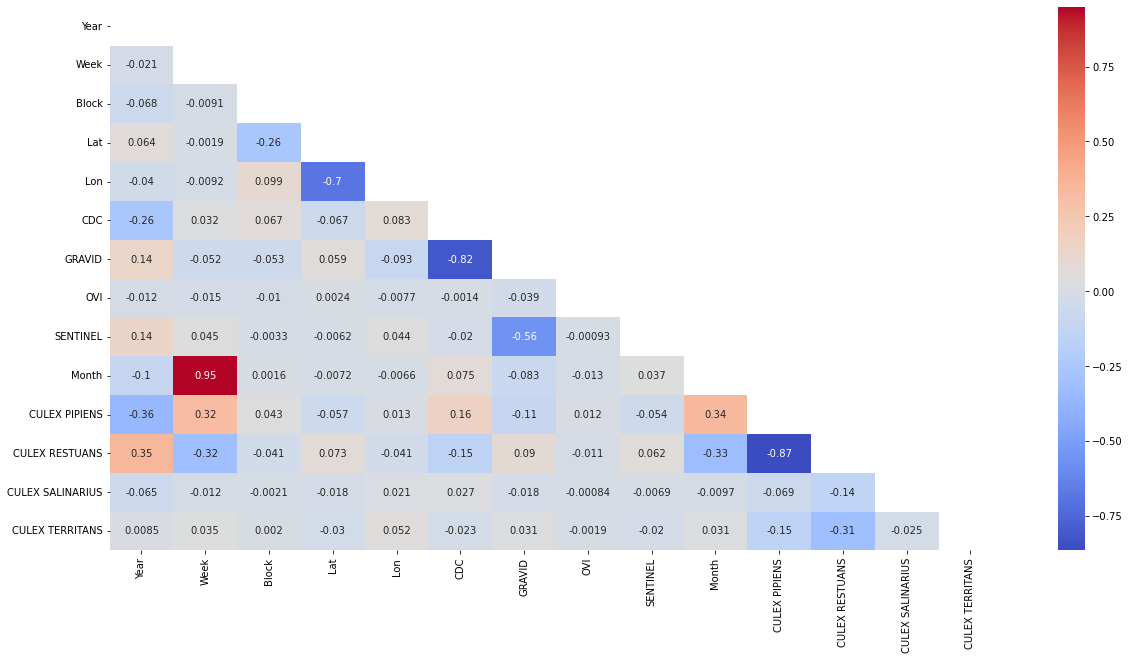

In [319]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

 The species CULEX PIPIENS as wekk as CULEX RESTUANS have a stronger negative correlations (-0.87). This may be due to domain knowledge I am not familiar with (they should share common attributes). The CDC and GRAVID tests also have a strong negative correlation (-0.85). Perhaps these tests are similar,this is also something related to the domain, something to ask the scientists on the team. So I will not drop these variables yet.

There's quite a bit of colinearity in the dataset - especially between week and month (they have a high positive correlation). Additionally, the latitude and longitude have a high correlation since the data is collected in the smaller city of Chicago. This may prevent us from making broader predictions about WNV in mosquitos in general, or across the country USA.

In [443]:
lin_df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007], dtype=int64)

Even though I could easily drop year due to its high correlation, I will keep it for now because it would be interesting to see the influence of year on mosquito number in our model. I will keep this in mind in the future, if the model is coming out to be less effective.

"This dataset does not respond well to performing VIF analysis, so this is not required."

FL
#### 2.3. Residuals Are Normally Distributed
Linear regression assumes normality for the residual errors $\epsilon$, which represent variation in $Y$ which is not explained by the predictor variables. 
We will address it after modelling, right now we don't have any model, therefore we don't have errors to test. 
#### 2.4. Homoscedasticity
The assumption of equal variances (i.e. assumption of homoscedasticity) assumes that different samples have the same variance, even if they came from different populations. We will address it after modelling as well. (Insights grom lecture (kickoff))

#### Choosing Variable for Model: Top-Down Approach

First I will use all the relevant independent variables to construct a linear model. Then I will gradually remove variables that could be leading to a less optimal/predictive result.

In [444]:
# Make sure we add our constant
X_const = sm.add_constant(X)
X_const.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15571 entries, 1 to 18493
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             15571 non-null  float64
 1   Year              15571 non-null  int64  
 2   Week              15571 non-null  int64  
 3   Block             15571 non-null  int64  
 4   WNV Present       15571 non-null  int64  
 5   Lat               15571 non-null  float64
 6   Lon               15571 non-null  float64
 7   CDC               15571 non-null  uint8  
 8   GRAVID            15571 non-null  uint8  
 9   OVI               15571 non-null  uint8  
 10  SENTINEL          15571 non-null  uint8  
 11  Month             15571 non-null  int64  
 12  WNV Mosquitos     15571 non-null  int64  
 13  CULEX PIPIENS     15571 non-null  uint8  
 14  CULEX RESTUANS    15571 non-null  uint8  
 15  CULEX SALINARIUS  15571 non-null  uint8  
 16  CULEX TERRITANS   15571 non-null  uint8 

C:\Users\jsmba\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [445]:
# fit our first linear model
my_linreg1 = linear_model.OLS(y, X_const).fit()

my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1104.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        02:35:46   Log-Likelihood:                -56685.
No. Observations:               15571   AIC:                         1.134e+05
Df Residuals:                   15556   BIC:                         1.135e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -960.4227     71.489    -13.435      0.000   -1100.549    -820.296
Year                 0.3023      0.023     13.201      0.000       0.257       0.347
Week                 0.0460      0.056      0.818      0.414      -0.064       0.156
Block                0.0124      0.002      5.507      0.000       0.008       0.017
WNV Present         -7.6203      0.296    -25.703      0.000      -8.201      -7.039
Lat                 -2.6996      0.962     -2.805      0.005      -4.586      -0.813
Lon                -10.9240      1.367     -7.991      0.000     -13.603      -8.244
CDC               -233.6918     17.911    -13.047      0.000    -268.800    -198.583
GRAVID            -241.5657     17.980    -13.435      0.000    -276.808    -206.323
OVI               -248.3397     19.353    -12.832      0.000    -286.274    -210.406
SENTINEL          -236.8256     17.984    -13.169      0.000    -272.076    -201.575
Month               -1.0921      0.244     -4.471      0.000      -1.571      -0.613
WNV Mosquitos        0.9676      0.011     90.304      0.000       0.947       0.989
CULEX PIPIENS     -237.1340     17.866    -13.273      0.000    -272.154    -202.114
CULEX RESTUANS    -237.4292     17.892    -13.270      0.000    -272.500    -202.358
CULEX SALINARIUS  -242.9931     17.867    -13.600      0.000    -278.015    -207.971
CULEX TERRITANS   -242.8665     17.877    -13.586      0.000    -277.907    -207.826
==============================================================================
Omnibus:                     8239.567   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51478.549
Skew:                           2.562   Prob(JB):                         0.00
Kurtosis:                      10.287   Cond. No.                     5.47e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1.1 | 0.498 |

The p-value for `Week` is quite high, which shows there is no evidence showing this variable is statistically significant to our model.

We will drop this column and try building another model.

In [446]:
# we will drop the 'Week' variable and perform another regression
X_new = X_const.drop(columns=['Week'])

my_linreg2 = linear_model.OLS(y, X_new).fit()
my_linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1189.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        02:36:42   Log-Likelihood:                -56685.
No. Observations:               15571   AIC:                         1.134e+05
Df Residuals:                   15557   BIC:                         1.135e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -965.7053     71.196    -13.564      0.000   -1105.257    -826.154
Year                 0.3066      0.022     13.757      0.000       0.263       0.350
Block                0.0124      0.002      5.495      0.000       0.008       0.017
WNV Present         -7.6132      0.296    -25.690      0.000      -8.194      -7.032
Lat                 -2.6972      0.962     -2.803      0.005      -4.584      -0.811
Lon                -10.9142      1.367     -7.984      0.000     -13.594      -8.235
CDC               -235.0221     17.837    -13.176      0.000    -269.985    -200.059
GRAVID            -242.8677     17.909    -13.561      0.000    -277.971    -207.764
OVI               -249.6883     19.282    -12.949      0.000    -287.484    -211.893
SENTINEL          -238.1271     17.913    -13.294      0.000    -273.239    -203.016
Month               -0.9033      0.080    -11.304      0.000      -1.060      -0.747
WNV Mosquitos        0.9675      0.011     90.301      0.000       0.947       0.989
CULEX PIPIENS     -238.4485     17.794    -13.401      0.000    -273.326    -203.571
CULEX RESTUANS    -238.7594     17.818    -13.400      0.000    -273.685    -203.834
CULEX SALINARIUS  -244.3107     17.794    -13.730      0.000    -279.189    -209.432
CULEX TERRITANS   -244.1866     17.803    -13.716      0.000    -279.083    -209.290
==============================================================================
Omnibus:                     8238.701   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51464.472
Skew:                           2.561   Prob(JB):                         0.00
Kurtosis:                      10.286   Cond. No.                     1.29e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1.1 | 0.498 |
| Model 1.1.2 | 0.498 |

Although the R squared is the same (explaining approximately 49.8% of the data), the p value of more variables are less than 0.05. I will try again and remove all of the variables with a p value greater than 0.00.

In [448]:
# we will drop the 'Lat' variable and perform another regression
X_newer = X_new.drop(columns=['Lat'])

my_linreg3 = linear_model.OLS(y, X_newer).fit()
my_linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1287.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        02:38:26   Log-Likelihood:                -56689.
No. Observations:               15571   AIC:                         1.134e+05
Df Residuals:                   15558   BIC:                         1.135e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -884.3129     65.017    -13.601      0.000   -1011.754    -756.872
Year                 0.3055      0.022     13.710      0.000       0.262       0.349
Block                0.0141      0.002      6.490      0.000       0.010       0.018
WNV Present         -7.5721      0.296    -25.577      0.000      -8.152      -6.992
Lon                 -8.2579      0.985     -8.382      0.000     -10.189      -6.327
CDC               -214.7152     16.303    -13.171      0.000    -246.670    -182.760
GRAVID            -222.5439     16.379    -13.588      0.000    -254.648    -190.440
OVI               -229.2100     17.848    -12.842      0.000    -264.194    -194.226
SENTINEL          -217.8438     16.389    -13.292      0.000    -249.969    -185.719
Month               -0.9045      0.080    -11.317      0.000      -1.061      -0.748
WNV Mosquitos        0.9660      0.011     90.256      0.000       0.945       0.987
CULEX PIPIENS     -218.0869     16.246    -13.424      0.000    -249.931    -186.242
CULEX RESTUANS    -218.4228     16.277    -13.419      0.000    -250.328    -186.518
CULEX SALINARIUS  -223.9551     16.248    -13.784      0.000    -255.803    -192.107
CULEX TERRITANS   -223.8481     16.261    -13.766      0.000    -255.721    -191.975
==============================================================================
Omnibus:                     8234.642   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51368.997
Skew:                           2.560   Prob(JB):                         0.00
Kurtosis:                      10.277   Cond. No.                     1.82e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1.1 | 0.498 |
| Model 1.1.2 | 0.498 |
| Model 1.1.3 | 0.498 |

The R-squared values are all the same! Till explaining 49.* of our results. Except this time, the p values are all less than 0.00. Let's try a bottom-up approach to see if we can get a higher R squared value

####  Bottom-Up approach

Now I will start with the variable that has a higher correlation with mosquito number, and see if it makes the model better.

In [324]:
lin_corr = lin_df.corr()
lin_corr['Mosquito number'].sort_values()

GRAVID             -0.176178
CULEX TERRITANS    -0.149261
Lon                -0.100425
CULEX SALINARIUS   -0.068595
Month              -0.009376
OVI                -0.005678
Week                0.000448
CULEX PIPIENS       0.037099
CULEX RESTUANS      0.049083
Lat                 0.059195
Block               0.081334
Year                0.117062
CDC                 0.123628
SENTINEL            0.128459
Mosquito number     1.000000
Name: Mosquito number, dtype: float64

As we can see above, `WNV Mosquitos` is correlated positively the most with `SENTINEL`, that is the presence of the SENTINEL trap. Let's build a model only including this variable.

In [326]:
# dont forget the constant (const) column for the regression
my_linreg3 = linear_model.OLS(y, X_const[['const', 'SENTINEL']]).fit()
my_linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sun, 15 May 2022   Prob (F-statistic):           2.76e-58
Time:                        23:22:24   Log-Likelihood:                -61928.
No. Observations:               15571   AIC:                         1.239e+05
Df Residuals:                   15569   BIC:                         1.239e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0295      0.104     96.262      0.000       9.825      10.234
SENTINEL      14.5351      0.899     16.163      0.000      12.772      16.298
==============================================================================
Omnibus:                     4678.003   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10840.955
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                       5.156   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1.1 | 0.498 |
| Model 1.1.2 | 0.498 |
| Model 1.1.3 | 0.498 |
| Model 1.1.4 | 0.017 |

The R-value has gotten even lower! Will add some more variables to help predict mosquito number

In [327]:
lin_corr = lin_df.corr()
lin_corr['Mosquito number'].sort_values()

GRAVID             -0.176178
CULEX TERRITANS    -0.149261
Lon                -0.100425
CULEX SALINARIUS   -0.068595
Month              -0.009376
OVI                -0.005678
Week                0.000448
CULEX PIPIENS       0.037099
CULEX RESTUANS      0.049083
Lat                 0.059195
Block               0.081334
Year                0.117062
CDC                 0.123628
SENTINEL            0.128459
Mosquito number     1.000000
Name: Mosquito number, dtype: float64

In [328]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price
my_linreg4 = linear_model.OLS(y, X_const[['const', 'SENTINEL', 'GRAVID', 
                                    'CDC','CULEX TERRITANS','Year']]).fit()
my_linreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     242.8
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.43e-250
Time:                        23:26:14   Log-Likelihood:                -61473.
No. Observations:               15571   AIC:                         1.230e+05
Df Residuals:                   15565   BIC:                         1.230e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1008.8989     57.628    -17.507      0.000   -1121.857    -895.941
SENTINEL           18.4631     12.577      1.468      0.142      -6.188      43.115
GRAVID              6.2231     12.545      0.496      0.620     -18.366      30.812
CDC                18.8992     12.558      1.505      0.132      -5.715      43.513
CULEX TERRITANS    -8.4036      0.449    -18.728      0.000      -9.283      -7.524
Year                0.5032      0.028     17.955      0.000       0.448       0.558
==============================================================================
Omnibus:                     4373.372   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9735.211
Skew:                           1.637   Prob(JB):                         0.00
Kurtosis:                       5.070   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1.1 | 0.498 |
| Model 1.1.2 | 0.498 |
| Model 1.1.3 | 0.498 |
| Model 1.1.4 | 0.017 |
| Model 1.1.5 | 0.072 |

After adding every variable one by one, we were able to achieve $R^2$ of 0.072 including only 5 independent variables.

However, our best model so far is **Model 1.1.2**, with $R^2$ = 0.098, which means this model is able to explain 49.8% of the variance.

## Model Diagnostics 

But we still are not finished!

We need to check two of the four assumptions associated with a linear regression model:
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**
(FL)


### 3. Residuals 
- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed (FL)

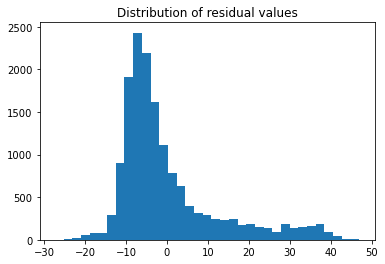

In [329]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(my_linreg2.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

This ditrtibution looks quite right skewed. Let's use a Shapiro-Wilk test to further explore this suspicion.

In [330]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg2.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.8209049701690674, pvalue=0.0)


C:\Users\jsmba\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis for the Shapiro-Wilk test is that the data are not normally distributed. 
Because the p-value is less than 0.05 (it's showing up as 0.0!), then the null hypothesis that the data are normally distributed is rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot.

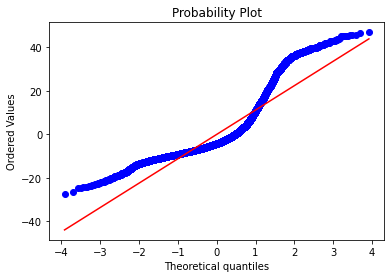

In [331]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg2.resid, dist="norm", plot = plt);
plt.show()

It looks like it is not like a normal distribution at all. It seems vert skewed on the left right and middle portion of the data! This means that we need to be wary of this model - and the claims and prediction it makes about overally mosquitos populations (in the U.S. for example). Especially, for instance, when it determines measures of central tendency.

### 4. Homoscedasticity

The variance of residual is the same .

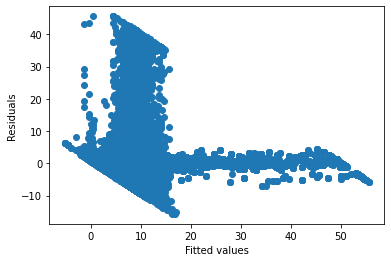

In [451]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg3.fittedvalues, my_linreg2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

It seems like this dataset has somewhat homoscedacity. It seems like the residuals on the life side seem to have less homoscedacity. More investigation would be required for the outer tails of the data.

### Logistical Regression

Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results, and discuss the model’s limitations. This may end up being an iterative process.
Note: Mosquito number should be one of your independent variables.

Frist, I will begin by making a copy of the numerical dataframe for logistical regression

In [452]:
log_df = mdf.copy()
#dropping the derived column since it is derived from our y variables (seeing if WNV is present)
log_df = log_df.drop(columns = "WNV Mosquitos")
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15571 entries, 1 to 18493
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              15571 non-null  int64  
 1   Week              15571 non-null  int64  
 2   Block             15571 non-null  int64  
 3   Mosquito number   15571 non-null  int64  
 4   WNV Present       15571 non-null  int64  
 5   Lat               15571 non-null  float64
 6   Lon               15571 non-null  float64
 7   CDC               15571 non-null  uint8  
 8   GRAVID            15571 non-null  uint8  
 9   OVI               15571 non-null  uint8  
 10  SENTINEL          15571 non-null  uint8  
 11  Month             15571 non-null  int64  
 12  CULEX PIPIENS     15571 non-null  uint8  
 13  CULEX RESTUANS    15571 non-null  uint8  
 14  CULEX SALINARIUS  15571 non-null  uint8  
 15  CULEX TERRITANS   15571 non-null  uint8  
dtypes: float64(2), int64(6), uint8(8)
memory

All of the variables are numerical! So we can eventually feed them into our model.

In [364]:
#double checking columns for the logistical regression
log_df.columns

Index(['Year', 'Week', 'Block', 'Mosquito number', 'WNV Present', 'Lat', 'Lon',
       'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'Month', 'CULEX PIPIENS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS'],
      dtype='object')

In [365]:
X = log_df.drop(columns = "WNV Present")
X.head()

,Year,Week,Block,Mosquito number,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,Month,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
1,2019,39,52,1,41.798211,-87.736925,0,1,0,0,9,0,1,0,0
2,2019,39,58,2,41.987245,-87.689417,0,1,0,0,9,0,1,0,0
3,2019,39,39,1,41.953664,-87.724987,0,1,0,0,9,0,1,0,0
4,2019,39,131,9,41.657069,-87.546049,0,1,0,0,9,0,1,0,0
5,2019,39,21,2,41.921777,-87.632140,0,1,0,0,9,0,1,0,0


In [366]:
y = log_df["WNV Present"]
y.head()

1    0
2    0
3    0
4    0
5    0
Name: WNV Present, dtype: int64

This was done before, just refreshing knowledge and checking to make sure that the predictors do not show collinearity and multicollinearity which is a prerequisite of applying logistic regression.

In [367]:
X_corr = X.corr()

<AxesSubplot:>

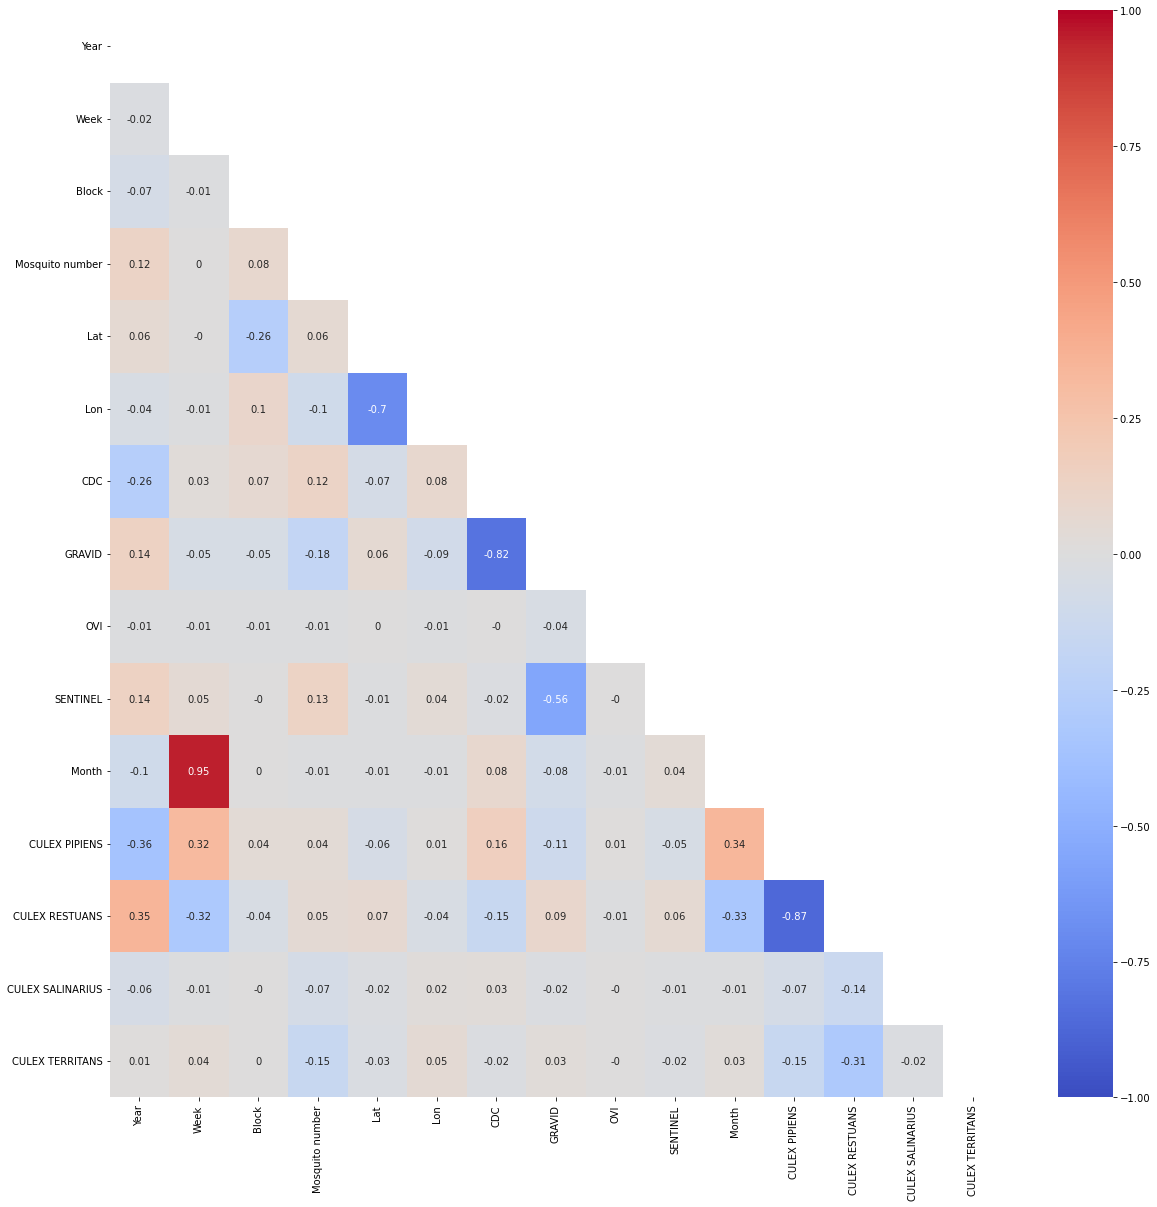

In [368]:
mask = np.triu(X_corr)


# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(X_corr.round(2), vmax=1, vmin=-1, center=0, annot=True, mask=mask, cmap='coolwarm')

The insights from this heatmap are very similar to those previous mentioned with linear regression. It's worth mentioning how incredibly high the correlation is between week and month. Again, those isnights could be interesting so I won't drop them for now.

#### Backward Selection

In [369]:
import statsmodels.api as sm

# add constant
X_const = sm.add_constant(X)

# instantiate the model
bank_logit = sm.Logit(y, X_const)

# fit the model to the data
bank_logit_fitted = bank_logit.fit()

# print model summary
bank_logit_fitted.summary()

         Current function value: 0.386109
         Iterations: 35


C:\Users\jsmba\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jsmba\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                15571
Model:                          Logit   Df Residuals:                    15557
Method:                           MLE   Df Model:                           13
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.2289
Time:                        00:33:01   Log-Likelihood:                -6012.1
converged:                      False   LL-Null:                       -7797.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -389.3654        nan        nan        nan         nan         nan
Year                 0.1206      0.008     15.480      0.000       0.105       0.136
Week                 0.0905      0.018      5.015      0.000       0.055       0.126
Block               -0.0017      0.001     -2.380      0.017      -0.003      -0.000
Mosquito number      0.0689      0.002     41.148      0.000       0.066       0.072
Lat                 -1.0377      0.310     -3.351      0.001      -1.645      -0.431
Lon                 -4.2109      0.439     -9.585      0.000      -5.072      -3.350
CDC                -89.8465   1.48e+06  -6.09e-05      1.000   -2.89e+06    2.89e+06
GRAVID             -89.6651   1.48e+06  -6.06e-05      1.000    -2.9e+06     2.9e+06
OVI               -119.0042   1.41e+07  -8.43e-06      1.000   -2.77e+07    2.77e+07
SENTINEL           -90.0917   1.48e+06   -6.1e-05      1.000   -2.89e+06    2.89e+06
Month                0.2411      0.078      3.098      0.002       0.089       0.394
CULEX PIPIENS      -96.2734        nan        nan        nan         nan         nan
CULEX RESTUANS     -96.6396        nan        nan        nan         nan         nan
CULEX SALINARIUS   -97.6407        nan        nan        nan         nan         nan
CULEX TERRITANS    -98.6607        nan        nan        nan         nan         nan
====================================================================================
"""

We note above, that for many variables, the associated p-values with the coefficients (the betas) are large. Therefore, we cannot safely reject the null hypothesis ($\beta_i = 0$), so in pratical terms, these independent variables are likely not predictive of the dependent variable. We try excluding these from the model and seeing if this has an effect or not. Note that removing many variables at once is to be avoided, as the p-values will vary based upon which are left in or out of the model together in combination.

Regardless of this fact, we can still make a prediction for y. We will do this leaving in the insignificant variables to establish a baseline accuracy:

In [370]:
# get predictions
y_proba = bank_logit_fitted.predict(X_const)

y_pred = np.where(y_proba >= 0.5, 1, 0)

num_correct = (y_pred == y).sum()

pct_accuracy = num_correct/X.shape[0]
pct_accuracy

0.8244171857941044

Baseline model accuray: 82.4%. This isn't too bad for a predictive model! Let's see if we can make it better by dropping certain variables.

In [371]:
# dropping the trap types as their p values are very high
X2 = X.drop(columns = ['SENTINEL', 'OVI','GRAVID', 'CDC'], axis=1)

In [372]:
# add constant
X_const2 = sm.add_constant(X2)

# instantiate the model
bank_logit2 = sm.Logit(y, X_const2)

# fit the model to the data
bank_logit_fitted2 = bank_logit2.fit()

# print model summary
bank_logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.386353
         Iterations 9


C:\Users\jsmba\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                15571
Model:                          Logit   Df Residuals:                    15560
Method:                           MLE   Df Model:                           10
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.2284
Time:                        00:33:11   Log-Likelihood:                -6015.9
converged:                       True   LL-Null:                       -7797.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -470.5436        nan        nan        nan         nan         nan
Year                 0.1205      0.007     16.069      0.000       0.106       0.135
Week                 0.0912      0.018      5.063      0.000       0.056       0.126
Block               -0.0018      0.001     -2.508      0.012      -0.003      -0.000
Mosquito number      0.0680      0.002     41.943      0.000       0.065       0.071
Lat                 -1.0646      0.309     -3.441      0.001      -1.671      -0.458
Lon                 -4.3621      0.435    -10.018      0.000      -5.216      -3.509
Month                0.2314      0.078      2.984      0.003       0.079       0.383
CULEX PIPIENS     -116.6003        nan        nan        nan         nan         nan
CULEX RESTUANS    -116.9668        nan        nan        nan         nan         nan
CULEX SALINARIUS  -117.9922        nan        nan        nan         nan         nan
CULEX TERRITANS   -118.9844        nan        nan        nan         nan         nan
====================================================================================
"""

In [373]:
# get predictions
y_proba = bank_logit_fitted2.predict(X_const2)

y_pred = np.where(y_proba >= 0.5, 1, 0)

num_correct = (y_pred == y).sum()

pct_accuracy = num_correct/X2.shape[0]
pct_accuracy

0.8248667394515445

Baseline model accuracy is now 82.5%, which a slight improvement. The good news is with this model the p values are less than 0.05. So the variables are leading to a more accurate prediction.

#### Forward Selection

Now I will build the model starting from the variable with the highest correlation to WNV present.

In [374]:
wm_corr = log_df.corr()
wm_corr['WNV Present'].sort_values()

Lon                -0.126576
CULEX TERRITANS    -0.108408
CULEX SALINARIUS   -0.044850
GRAVID             -0.043974
CULEX RESTUANS     -0.020968
OVI                -0.004010
Block               0.008864
CDC                 0.013321
SENTINEL            0.057386
Lat                 0.072799
CULEX PIPIENS       0.085287
Year                0.141943
Month               0.169369
Week                0.183040
Mosquito number     0.417179
WNV Present         1.000000
Name: WNV Present, dtype: float64

In [378]:
new_X = X_const['Mosquito number']
new_X_const = sm.add_constant(new_X)

In [379]:
#Initializing
forward_logit = sm.Logit(y, new_X_const)

In [380]:
#Fitting
fitted_forward = forward_logit.fit()

Optimization terminated successfully.
         Current function value: 0.427020
         Iterations 6


In [381]:
#Summary
fitted_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                15571
Model:                          Logit   Df Residuals:                    15569
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.1472
Time:                        00:34:19   Log-Likelihood:                -6649.1
converged:                       True   LL-Null:                       -7797.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2569      0.031    -73.018      0.000      -2.317      -2.196
Mosquito number     0.0673      0.001     45.218      0.000       0.064       0.070
===================================================================================
"""

In [382]:
# Calculate soft predictions
y_proba = fitted_forward.predict(new_X_const)

# Convert soft predictions to hard predictions 0/1
y_pred = np.where(y_proba >= 0.5, 1, 0)

# Calculate # correct
num_correct = (y_pred == y).sum()

# Calculate the percentage accuracy
pct_accuracy = num_correct / X.shape[0]

print(f'The baseline model accuracy is {pct_accuracy*100.0}%')

The baseline model accuracy is 80.68203712028772%


The model accuracy of 80.68 is a donwgrade from our previous model. So for now, I'm going to go with the previous model. It can be stated overall, that the variable Mosquito Number is an important predictor of WNV presence with a mositive correlation. In broader terms, keeping the imperfect accuracy in mind, we can say that the more mosquitos there are the greater the probability of WNV being present.

## Conclusions

- on average more mosquitos were trapped in August, with the majority in the hot summer months of July and August and less in spring and fall months
- We cannot accept the hypothesis that there is a statistically significant difference between mosquitos when looking at the occurence of West Nile Virus
- Longitude and month are negatively correlated to mosquito number, while the rest are positively correlated
- The linear model with the highest R-squared value (accounted for 49.8% of the predictions) did not include latitude and month and predicting variables. 
- The logistical regression model with the highest accuracy included most variables except for the four different trap types as predictors. Hence the trap type were not very good predictors for which mosquitos had WNV present